In [62]:
import pandas as pd
import numpy as np
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
 
 
df = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/ERN-sessions/main/data/diabetes_data.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [63]:
features = list(df.columns)[0:8] # saves typing the column names

features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [64]:
X = df[features]

y = df['Outcome']

# use features to predict outcome in logistic regression
# run enough iterations to get a good model, but not too many so as to avoid over-fitting the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11) # 75% of data for model, 25% for testing

In [65]:
lr = LogisticRegression(random_state=1, max_iter=500) # want to set max_iter as low as possible where it converges on a model

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
 
lr = LogisticRegression(random_state=1, max_iter=500)
 
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
 
test_vals = X_test
test_vals['outcomes'] = y_pred
 
test_vals
 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcomes
210,2,81,60,22,0,27.7,0.290,25,0
340,1,130,70,13,105,25.9,0.472,22,0
649,0,107,60,25,0,26.4,0.133,23,0
477,7,114,76,17,110,23.8,0.466,31,0
432,1,80,74,11,60,30.0,0.527,22,0
...,...,...,...,...,...,...,...,...,...
419,3,129,64,29,115,26.4,0.219,28,0
300,0,167,0,0,0,32.3,0.839,30,1
296,2,146,70,38,360,28.0,0.337,29,0
582,12,121,78,17,0,26.5,0.259,62,0


In [66]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix # 2x2, adds to 192 rows of data

array([[116,  10],
       [ 35,  31]])

Text(0.5, 1.0, 'Confusion matrix for diabetes prediction model')

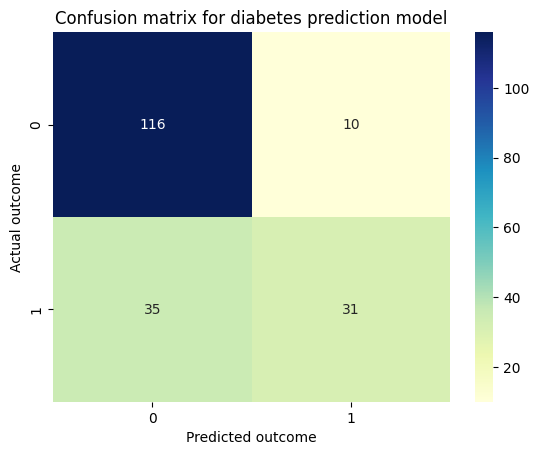

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
 
class_names = ['Non-diabetes', 'Diabetes']
 
fig, ax = plt.subplots()
 
tick_marks = np.arange(len(class_names))
 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
 
sns.heatmap(data=pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
 
plt.xlabel('Predicted outcome')
plt.ylabel('Actual outcome')
plt.title('Confusion matrix for diabetes prediction model')

In [68]:
from sklearn.metrics import classification_report
output_report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
output_report

{'Non-diabetes': {'precision': 0.7682119205298014,
  'recall': 0.9206349206349206,
  'f1-score': 0.8375451263537906,
  'support': 126.0},
 'Diabetes': {'precision': 0.7560975609756098,
  'recall': 0.4696969696969697,
  'f1-score': 0.5794392523364486,
  'support': 66.0},
 'accuracy': 0.765625,
 'macro avg': {'precision': 0.7621547407527056,
  'recall': 0.6951659451659451,
  'f1-score': 0.7084921893451196,
  'support': 192.0},
 'weighted avg': {'precision': 0.7640476094330481,
  'recall': 0.765625,
  'f1-score': 0.7488212321603293,
  'support': 192.0}}

In [69]:
# visualise how good our model is

# y_pred_proba = lr.predict_proba(X_test)[::,1]
y_pred_proba = (lr.predict_proba(X_test)[::,1] >= 0.6).astype(int)

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr, label=f'{auc}')

# results in ValueError - Will gets this too!
# works in notes: https://github.com/data-to-insight/ERN-sessions/blob/main/Intro%20to%20forecasting%20and%20ML/3%20logistic%20regression.ipynb

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- outcomes


In [76]:
import itertools

combinations = []

for i in range(1, 9):
    combs_at_i = list(itertools.combinations(features, i))
    combinations.extend(combs_at_i)

print(combinations)

accuracy = 0
best_X = 0

for feature_set in combinations:
    X = df[list(feature_set)]
    y = df.Outcome
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

    lr_iterated = LogisticRegression(random_state=1, max_iter=500)

    lr_iterated.fit(X_train, y_train)
    y_pred = lr_iterated.predict(X_test)

    output_report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

    acc = output_report['accuracy']
    if acc > accuracy:
        accuracy = acc
        best_X = list(feature_set)

print(best_X)

[('Pregnancies',)]
['Pregnancies']
